<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_Exploratoria_de_Dados/blob/main/AED_7_Prof_Resolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Aula 7 Professor Resolve
---
Vamos acompanhar algumas explorações de dados juntos? Nesse vídeo eu vou mostrar para você como trabalhar alguns conjuntos de dados o que pode ser útil para você realizar o seu projeto de EDA. 

Este material mostra como obter e tratar dados do [Gapminder](https://www.gapminder.org/) e do [WID](https://wid.world/) e como combinar uma ou mais dessas bases! 

# Gapminder

![imagem](https://www.gapminder.org/wp-content/themes/gapminder2/images/gapminder-logo.svg)

Essa é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.

Acesse [aqui](https://www.gapminder.org/data/) para extrair os dados. 

Escolha os dados de seu interesse. Faça o download no formato `.csv` para o local que desejar.

In [ ]:
import pandas as pd

school = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/gapminder_school_men_15_to_24_years.csv')
school.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1.82,1.87,1.92,1.97,2.02,2.07,2.12,2.17,2.23,2.28,2.34,2.40,2.46,2.52,2.58,2.64,2.71,2.78,2.84,2.91,2.98,3.05,3.13,3.20,3.28,3.36,3.44,3.52,3.60,3.69,3.78,3.86,3.95,4.05,4.14,4.23,4.33,4.43,4.53,4.63,4.73,4.84,4.94,5.05,5.16,5.27
1,Albania,5.47,5.58,5.69,5.80,5.91,6.02,6.13,6.24,6.36,6.47,6.59,6.71,6.83,6.95,7.06,7.19,7.31,7.43,7.55,7.67,7.80,7.92,8.05,8.17,8.30,8.43,8.55,8.68,8.81,8.95,9.08,9.21,9.35,9.48,9.62,9.75,9.89,10.00,10.20,10.30,10.40,10.60,10.70,10.90,11.00,11.20
2,Algeria,2.77,2.86,2.95,3.04,3.14,3.25,3.35,3.46,3.58,3.69,3.82,3.95,4.08,4.22,4.36,4.51,4.66,4.82,4.99,5.17,5.35,5.54,5.75,5.96,6.19,6.43,6.59,6.76,6.92,7.08,7.23,7.39,7.54,7.69,7.84,7.99,8.13,8.28,8.42,8.57,8.71,8.85,8.99,9.14,9.28,9.42
3,Andorra,9.16,9.30,9.44,9.58,9.72,9.86,10.00,10.10,10.30,10.40,10.60,10.70,10.80,11.00,11.10,11.20,11.40,11.50,11.70,11.80,11.90,12.10,12.20,12.30,12.40,12.60,12.70,12.80,12.90,13.10,13.20,13.30,13.40,13.60,13.70,13.80,13.90,14.10,14.20,14.30,14.40,14.50,14.60,14.70,14.80,14.90
4,Angola,2.25,2.31,2.36,2.42,2.48,2.54,2.60,2.67,2.73,2.80,2.86,2.93,3.00,3.07,3.14,3.22,3.29,3.37,3.44,3.52,3.60,3.69,3.77,3.85,3.94,4.03,4.12,4.21,4.30,4.39,4.49,4.59,4.69,4.79,4.89,5.00,5.10,5.21,5.32,5.43,5.55,5.66,5.78,5.90,6.02,6.14


# Preparação dos Dados

Vamos obter aqui dados de escolaridade e emissões de co2 do Brasil. O Gapminder fornece esses dados em conjuntos separados e vamos combinar esses dados para nossa análise.

In [ ]:
school_BR = school[ school.country == 'Brazil' ]
school_BR

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
23,Brazil,3.4,3.47,3.55,3.64,3.72,3.8,3.89,3.97,4.06,4.15,4.24,4.33,4.42,4.52,4.61,4.71,4.81,4.91,5.01,5.11,5.21,5.32,5.42,5.53,5.64,5.75,5.86,5.97,6.08,6.2,6.32,6.43,6.55,6.67,6.79,6.92,7.04,7.17,7.29,7.42,7.55,7.68,7.81,7.94,8.08,8.21


In [ ]:
BR = pd.melt(school_BR, id_vars=['country'])
BR.head()

,country,variable,value
0,Brazil,1970,3.40
1,Brazil,1971,3.47
2,Brazil,1972,3.55
3,Brazil,1973,3.64
4,Brazil,1974,3.72


In [ ]:
BR = BR.rename(columns={'variable':'year','value':'school'})
BR.head()

,country,year,school
0,Brazil,1970,3.40
1,Brazil,1971,3.47
2,Brazil,1972,3.55
3,Brazil,1973,3.64
4,Brazil,1974,3.72


In [ ]:
co2 = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/gapminder_co2_emissions_tonnes_per_person.csv')
co2_BR = co2[ co2.country == 'Brazil' ]
co2_BR

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
23,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.59,1.54,1.38,1.35,1.28,1.27,1.33,1.43,1.46,1.45,1.45,1.39,1.43,1.42,1.46,1.5,1.58,1.71,1.78,1.82,1.84,1.86,1.88,1.83,1.75,1.81,1.84,1.82,1.88,1.98,1.86,2.1,2.18,2.31,2.46,2.59,2.42,2.2,2.23,2.18


In [ ]:
co2_BR = pd.melt(co2_BR, id_vars=['country'])
co2_BR = co2_BR.rename(columns={'variable':'year','value':'co2'})
co2_BR.head()

,country,year,co2
0,Brazil,1800,NaN
1,Brazil,1801,NaN
2,Brazil,1802,NaN
3,Brazil,1803,NaN
4,Brazil,1804,NaN


In [ ]:
BR = pd.merge(BR,co2_BR,on=['country','year'])
BR.head()

,country,year,school,co2
0,Brazil,1970,3.40,0.984
1,Brazil,1971,3.47,1.050
2,Brazil,1972,3.55,1.140
3,Brazil,1973,3.64,1.290
4,Brazil,1974,3.72,1.370


# Visualização e Análise dos Dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

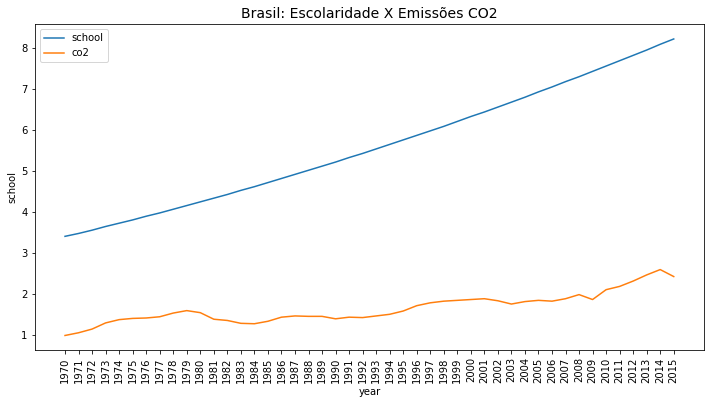

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=BR.school, label='school')
sns.lineplot(x=BR.year, y=BR.co2, label='co2')

plt.title('Brasil: Escolaridade X Emissões CO2', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

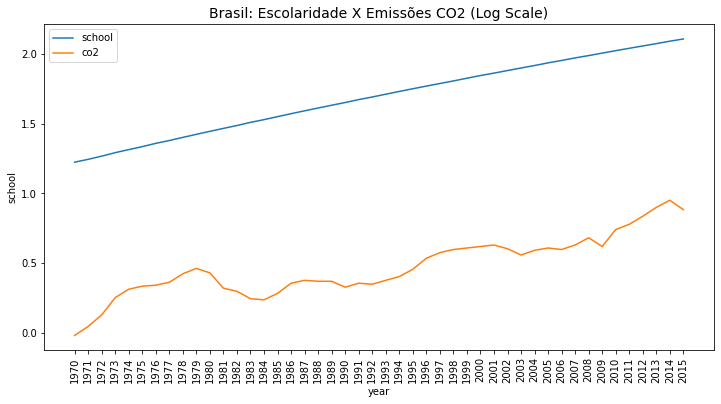

In [ ]:
import numpy as np 
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=np.log( BR.school ), label='school')
sns.lineplot(x=BR.year, y=np.log( BR.co2 ), label='co2')

plt.title('Brasil: Escolaridade X Emissões CO2 (Log Scale)', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# World Inequality Database

![imagem](https://www.hup.harvard.edu/images/jackets/9780674979857.jpg)

Vamos ver como combinar dados de outras fontes? 

O World Inequality Database é uma base de dados aberta que mantem informações sobre desigualdade e concentração de renda no mundo. Esses dados são a base do livro **Capital in the Twenty-First Century** de *Thomas Piketty*.

In [ ]:
from IPython.display import IFrame
IFrame('https://wid.world/data/', width='1000', height=400)

Se você for empregar essa base escolha os índices de interesse, a estrutura da tabela e dê preferência para o formato `.xlsx` para download.

# Preparação dos Dados

Vamos selecionar dados do Brasil de 2000-2019 sobre a renda per capta (gpd) e o percentual da renda concentrado nos 10% mais ricos da população (percentil 10), e combinar esses dados com as informações que já coletamos do gapminder.

In [ ]:
gpd_BR = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/WID_Data_13092021-135730.xlsx',header=None)
gpd_BR


,0,1,2,3,4
0,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2000,16488.0559
1,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2001,16323.1697
2,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2002,16416.2538
3,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2003,16204.9913
4,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2004,16740.7222
5,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2005,16895.3652
6,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2006,17186.5514
7,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2007,17859.2235
8,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2008,18405.1977
9,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2009,18036.7397


In [ ]:
gpd_BR.columns = ['country', 'ind_description',  'ind_code', 'year', 'value']
gpd_BR.year = gpd_BR.year.astype(str)
display(gpd_BR)
display(gpd_BR.dtypes)
        

,country,ind_description,ind_code,year,value
0,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2000,16488.0559
1,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2001,16323.1697
2,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2002,16416.2538
3,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2003,16204.9913
4,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2004,16740.7222
5,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2005,16895.3652
6,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2006,17186.5514
7,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2007,17859.2235
8,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2008,18405.1977
9,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2009,18036.7397


country             object
ind_description     object
ind_code            object
year                object
value              float64
dtype: object

In [ ]:
gpd_BR_all = gpd_BR[ gpd_BR.ind_code == 'pall' ][['country', 'year', 'value']]
gpd_BR_perc = gpd_BR[ gpd_BR.ind_code == 'p90p100' ][['country', 'year', 'value']]

display(gpd_BR_all)
display(gpd_BR_perc)

,country,year,value
0,Brazil,2000,16488.0559
1,Brazil,2001,16323.1697
2,Brazil,2002,16416.2538
3,Brazil,2003,16204.9913
4,Brazil,2004,16740.7222
5,Brazil,2005,16895.3652
6,Brazil,2006,17186.5514
7,Brazil,2007,17859.2235
8,Brazil,2008,18405.1977
9,Brazil,2009,18036.7397


,country,year,value
20,Brazil,2000,0.5654
21,Brazil,2001,0.5654
22,Brazil,2002,0.5425
23,Brazil,2003,0.5680
24,Brazil,2004,0.5642
25,Brazil,2005,0.5637
26,Brazil,2006,0.5676
27,Brazil,2007,0.5326
28,Brazil,2008,0.5819
29,Brazil,2009,0.5885


In [ ]:
BR = pd.merge(BR,gpd_BR_all,on=['country','year'])
BR = BR.rename(columns={'value':'gpd'})
BR.head()

,country,year,school,co2,gpd
0,Brazil,2000,6.32,1.86,16488.0559
1,Brazil,2001,6.43,1.88,16323.1697
2,Brazil,2002,6.55,1.83,16416.2538
3,Brazil,2003,6.67,1.75,16204.9913
4,Brazil,2004,6.79,1.81,16740.7222


In [ ]:
BR = pd.merge(BR,gpd_BR_perc,on=['country','year'])
BR = BR.rename(columns={'value':'gpd_perc10'})
BR.head()

,country,year,school,co2,gpd,gpd_perc10
0,Brazil,2000,6.32,1.86,16488.0559,0.5654
1,Brazil,2001,6.43,1.88,16323.1697,0.5654
2,Brazil,2002,6.55,1.83,16416.2538,0.5425
3,Brazil,2003,6.67,1.75,16204.9913,0.5680
4,Brazil,2004,6.79,1.81,16740.7222,0.5642


# Visualização e Análise dos Dados

Como queremos comparar dados em escalas muito diferentes uma sugestão é empregarmos dados normalizados.

In [ ]:
for c in BR[['school','co2','gpd','gpd_perc10']]:
  BR[c] = BR[c] / BR[c].max()
BR.head()

,country,year,school,co2,gpd,gpd_perc10
0,Brazil,2000,0.769793,0.718147,0.835477,0.941235
1,Brazil,2001,0.783191,0.725869,0.827122,0.941235
2,Brazil,2002,0.797808,0.706564,0.831839,0.903113
3,Brazil,2003,0.812424,0.675676,0.821134,0.945564
4,Brazil,2004,0.827040,0.698842,0.848280,0.939238


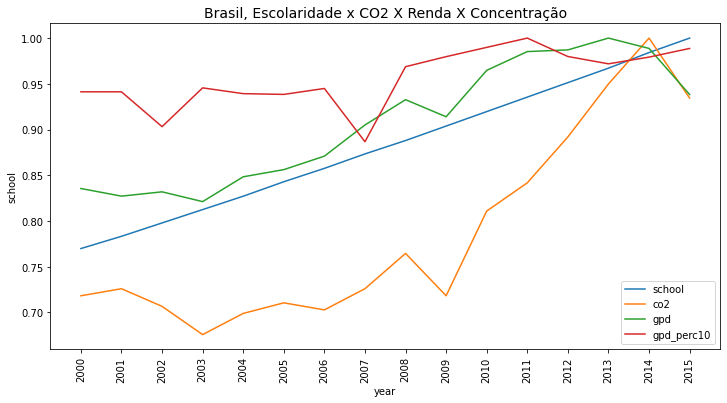

In [ ]:
plt.figure(figsize=(12,6))

for c in BR[['school','co2','gpd','gpd_perc10']]:
  sns.lineplot(x=BR.year, y=BR[c], label=c)

plt.title('Brasil, Escolaridade x CO2 X Renda X Concentração', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Conclusões

Às análises devem ser finalizadas com uma conclusão, em geral um texto escrito e que inclui os resultados, limitações da análise e sugestões de próximos passos.

> *Os dados acima mostram que a escolaridade, renda e concentração de renda vem crescendo no Brasil de modo bastante correlacionado nas últimas décadas, havendo entretanto um maior aumento de emissões nos últimos anos.*